In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Benefit of using vectorized string methods
* Better performance
* Code that is easier to read and write
* Automatically excludes missing values

In [2]:
happiness2015 = pd.read_csv('World_Happiness_2015.csv')
world_dev = pd.read_csv('World_dev.csv')
col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData':'IESurvey'}
merged = pd.merge(left = happiness2015, right = world_dev, how = 'left', left_on='Country',
                 right_on='ShortName')
merged.rename(col_renaming, axis = 1, inplace = True)
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 157
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region_x                       158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
 12  CountryCode                    145 non-null    obj

In [3]:
merged.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0


* Extract currency unit from CurrencyUnit

In [4]:
def extract_last_word(element):
    return str(element).split()[-1]
merged['Currency Apply'] = merged.CurrencyUnit.apply(extract_last_word)
merged['Currency Apply'].head()

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Apply, dtype: object

In [5]:
merged['Currency Vectorized'] = merged['CurrencyUnit'].str.split().str.get(-1)
merged['Currency Vectorized'].head()

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Vectorized, dtype: object

In [6]:
merged.CurrencyUnit.isnull().sum()

13

In [7]:
def compute_lengths(element):
    if pd.isnull(element):
        pass
    else:
        return len(str(element))
merged.CurrencyUnit.apply(compute_lengths).value_counts(dropna= False)

14.0    21
4.0     20
12.0    17
13.0    14
NaN     13
15.0    13
16.0    12
18.0     9
17.0     9
11.0     8
22.0     7
25.0     5
19.0     3
9.0      2
10.0     1
39.0     1
26.0     1
23.0     1
20.0     1
Name: CurrencyUnit, dtype: int64

In [8]:
lengths = merged.CurrencyUnit.str.len()
value_counts = lengths.value_counts(dropna = False)
value_counts

14.0    21
4.0     20
12.0    17
13.0    14
NaN     13
15.0    13
16.0    12
18.0     9
17.0     9
11.0     8
22.0     7
25.0     5
19.0     3
9.0      2
10.0     1
39.0     1
26.0     1
23.0     1
20.0     1
Name: CurrencyUnit, dtype: int64

In [9]:
merged.SpecialNotes.unique()

array([nan,
       'Fiscal year end: March 31; reporting period for national accounts data: CY.',
       'A simple multiplier is used to convert the national currencies of EMU members to euros. The following irrevocable euro conversion rate was adopted by the EU Council on January 1, 1999: 1 euro = 5.94573 Finnish markka. Please note that historical data before 1999 are not actual euros and are not comparable or suitable for aggregation across countries.',
       'A simple multiplier is used to convert the national currencies of EMU members to euros. The following irrevocable euro conversion rate was adopted by the EU Council on January 1, 1999: 1 euro = 2.20371 Netherlands guilder. Please note that historical data before 1999 are not actual euros and are not comparable or suitable for aggregation across countries.',
       'Fiscal year end: June 30; reporting period for national accounts data: CY.',
       'Fiscal year end: June 30; reporting period for national accounts data: FY. Val

In [10]:
pattern = r"[Nn]ational accounts"
national_accounts = merged.SpecialNotes.str.contains(pattern)
national_accounts.head()

0     NaN
1     NaN
2     NaN
3     NaN
4    True
Name: SpecialNotes, dtype: object

In [11]:
national_accounts.value_counts(dropna = False)

NaN      65
True     54
False    39
Name: SpecialNotes, dtype: int64

In [12]:
national_accounts = merged.SpecialNotes.str.contains(r"[Nn]ational accounts", na = False) # How to treat na

In [13]:
merged_national_accounts = merged[national_accounts]
merged_national_accounts.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Currency Apply,Currency Vectorized
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0,dollar,dollar
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,...,2011,NaN,"Income survey (IS), 2005",Yes,2010,2010.0,2013.0,2007.0,krona,krona
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,...,2013,NaN,NaN,Yes,2012,2010.0,2013.0,2002.0,dollar,dollar
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,...,2011,NaN,"Expenditure survey/budget survey (ES/BS), 2003",Yes,2011,2011.0,2013.0,2000.0,dollar,dollar
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,...,2010,NaN,"Labor force survey (LFS), 2010",Yes,2012,2008.0,2013.0,2005.0,dollar,dollar


In [14]:
pattern = r"([1-2][0-9]{3})" #Need () here????
# The parentheses indicate that only the character pattern matched should be extracted and returned in a series
# It's a capture group!!!
years = merged.SpecialNotes.str.extract(pattern, expand = False)
years

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
153    2006
154     NaN
155     NaN
156     NaN
157    2013
Name: SpecialNotes, Length: 158, dtype: object

In [15]:
type(merged.SpecialNotes.str.extract(pattern))

pandas.core.frame.DataFrame

In [16]:
merged = merged.set_index('Country')
merged.head()

,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,...,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Currency Apply,Currency Vectorized
Country,,,,,,,,,,,,,,,,,,,,,
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,...,2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0,franc,franc
Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,...,2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0,krona,krona
Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,...,2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0,krone,krone
Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,...,2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0,krone,krone
Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,...,2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0,dollar,dollar


#### Extract all of the years, named capturing group

In [17]:
pattern = r"(?P<Years>[1-2][0-9]{3})"
merged.SpecialNotes.str.extractall(pattern).head()

Years
Country     match      
Finland     0      1999
            1      1999
Netherlands 0      1999
            1      2037
            2      1999

In [18]:
merged.SpecialNotes.str.extract(r'([1-2][0-9]{3})').head()

,0
Country,
Switzerland,NaN
Iceland,NaN
Denmark,NaN
Norway,NaN
Canada,NaN


In [19]:
years = merged.IESurvey.str.extractall(pattern)
value_counts = years.Years.value_counts()
value_counts

2012    33
2010    28
2011    22
2013    12
2009     8
2008     6
2005     6
2007     4
2004     3
1995     1
2006     1
1999     1
2000     1
1998     1
2003     1
2002     1
1992     1
Name: Years, dtype: int64

In [20]:
pattern = r"(?P<First_Year>[1-2][0-9]{3})(/)?(?P<Second_Year>[0-9]{2})?"
years = merged.IESurvey.str.extractall(pattern)

In [21]:
years.sort_values('Second_Year')

,,First_Year,1,Second_Year
Country,match,,,
Kenya,0,2005,/,06
Angola,0,2008,/,09
Mozambique,0,2008,/,09
Nigeria,0,2009,/,10
Mali,0,2009,/,10
...,...,...,...,...
Guinea,0,2012,NaN,NaN
Burkina Faso,0,2009,NaN,NaN
Afghanistan,0,2008,NaN,NaN


In [22]:
pattern = r"(?P<First_Year>[1-2][0-9]{3})/?(?P<Second_Year>[0-9]{2})?"
# Not enclose / to exclude / in final result
years = merged.IESurvey.str.extractall(pattern)
first_two_year = years['First_Year'].str[:2]
years['Second_Year'] = first_two_year + years['Second_Year']
years.head()

,,First_Year,Second_Year
Country,match,,
Switzerland,0,2004,NaN
Iceland,0,2010,NaN
Denmark,0,2010,NaN
Norway,0,2010,NaN
Canada,0,2010,NaN


* If part of the regex isn't grouped using parantheses, (), it won't be extracted.
* When we add a string to a column using the plus sign, +, pandas will add that string to every value in the column. Note that the strings will be added together without any spaces.


In [23]:
merged.IncomeGroup.unique()

array(['High income: OECD', 'Upper middle income', 'High income: nonOECD',
       nan, 'Lower middle income', 'Low income'], dtype=object)

In [24]:
merged.IncomeGroup.value_counts(dropna = False)

Upper middle income     39
Lower middle income     35
High income: OECD       30
Low income              24
High income: nonOECD    17
NaN                     13
Name: IncomeGroup, dtype: int64

In [25]:
merged.pivot_table(values = 'Happiness Score', index = 'IncomeGroup')

,Happiness Score
IncomeGroup,
High income: OECD,6.674000
High income: nonOECD,6.250765
Low income,3.925625
Lower middle income,4.927971
Upper middle income,5.426718


In [26]:
income_group = merged.IncomeGroup
income_group.unique()

array(['High income: OECD', 'Upper middle income', 'High income: nonOECD',
       nan, 'Lower middle income', 'Low income'], dtype=object)

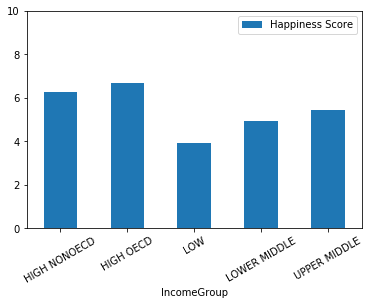

In [27]:
merged['IncomeGroup'] = merged['IncomeGroup'].str.replace(':', '').str.replace(' income', '').str.upper()
pv_incomes = merged.pivot_table(index = 'IncomeGroup', values = 'Happiness Score')
pv_incomes.plot(kind = 'bar', rot = 30, ylim = (0,10))

### Handling missing and duplicate data

In [28]:
happiness2015 = pd.read_csv('wh_2015.csv')
happiness2016 = pd.read_csv('wh_2016.csv')
happiness2017 = pd.read_csv('wh_2017.csv')

In [29]:
shape_2015 = happiness2015.shape
shape_2016 = happiness2016.shape
shape_2017 = happiness2017.shape
print(shape_2015, shape_2016, shape_2017)

(164, 13) (164, 14) (164, 13)


In [30]:
happiness2016.iloc[157:158]

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
157,Central African Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016


In [31]:
missing = happiness2015['Happiness Score'].isnull()
happiness2015[missing]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
158,Belize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
159,Namibia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
160,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
161,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
162,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
163,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


In [32]:
happiness2015.isnull().sum()

Country                          0
Region                           6
Happiness Rank                   6
Happiness Score                  6
Standard Error                   6
Economy (GDP per Capita)         6
Family                           6
Health (Life Expectancy)         6
Freedom                          6
Trust (Government Corruption)    6
Generosity                       6
Dystopia Residual                6
Year                             0
dtype: int64

In [33]:
missing_2016 = happiness2016.isnull().sum()
missing_2017 = happiness2017.isnull().sum()

#### Workflow to chean missing data
- 1. Check for errors in data cleaning/transformation
- 2. Use data from additional sources to fill missing values
- 3. Drop row/column
- 4. Fill missing values with reasonalble estimates computed from the available data

In [34]:
combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index = True)
combined.isnull().sum()

Country                            0
Region                           177
Happiness Rank                   177
Happiness Score                  177
Standard Error                   334
Economy (GDP per Capita)         177
Family                            22
Health (Life Expectancy)         177
Freedom                           22
Trust (Government Corruption)    177
Generosity                        22
Dystopia Residual                177
Year                               0
Lower Confidence Interval        335
Upper Confidence Interval        335
Happiness.Rank                   337
Happiness.Score                  337
Whisker.high                     337
Whisker.low                      337
Economy..GDP.per.Capita.         337
Health..Life.Expectancy.         337
Trust..Government.Corruption.    337
Dystopia.Residual                337
dtype: int64

In [35]:
print(happiness2015.columns)
print(happiness2016.columns)
print(happiness2017.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object')
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year'],
      dtype='object')


In [36]:
happiness2015.columns = happiness2015.columns.str.replace('(', '').str.replace(')','').str.replace('\s+',' ').str.strip().str.upper()
happiness2017.columns = happiness2017.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.strip().str.upper()
happiness2016.columns = happiness2016.columns.str.replace('(', '').str.replace(')','').str.replace('\s+',' ').str.strip().str.upper()

In [37]:
print(happiness2015.columns)
print(happiness2016.columns)
print(happiness2017.columns)

Index(['COUNTRY', 'REGION', 'HAPPINESS RANK', 'HAPPINESS SCORE',
       'STANDARD ERROR', 'ECONOMY GDP PER CAPITA', 'FAMILY',
       'HEALTH LIFE EXPECTANCY', 'FREEDOM', 'TRUST GOVERNMENT CORRUPTION',
       'GENEROSITY', 'DYSTOPIA RESIDUAL', 'YEAR'],
      dtype='object')
Index(['COUNTRY', 'REGION', 'HAPPINESS RANK', 'HAPPINESS SCORE',
       'LOWER CONFIDENCE INTERVAL', 'UPPER CONFIDENCE INTERVAL',
       'ECONOMY GDP PER CAPITA', 'FAMILY', 'HEALTH LIFE EXPECTANCY', 'FREEDOM',
       'TRUST GOVERNMENT CORRUPTION', 'GENEROSITY', 'DYSTOPIA RESIDUAL',
       'YEAR'],
      dtype='object')
Index(['COUNTRY', 'HAPPINESS RANK', 'HAPPINESS SCORE', 'WHISKER HIGH',
       'WHISKER LOW', 'ECONOMY GDP PER CAPITA', 'FAMILY',
       'HEALTH LIFE EXPECTANCY', 'FREEDOM', 'GENEROSITY',
       'TRUST GOVERNMENT CORRUPTION', 'DYSTOPIA RESIDUAL', 'YEAR'],
      dtype='object')


In [38]:
combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True)
missing = combined.isnull().sum()
missing

COUNTRY                          0
REGION                         177
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
STANDARD ERROR                 334
ECONOMY GDP PER CAPITA          22
FAMILY                          22
HEALTH LIFE EXPECTANCY          22
FREEDOM                         22
TRUST GOVERNMENT CORRUPTION     22
GENEROSITY                      22
DYSTOPIA RESIDUAL               22
YEAR                             0
LOWER CONFIDENCE INTERVAL      335
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
dtype: int64

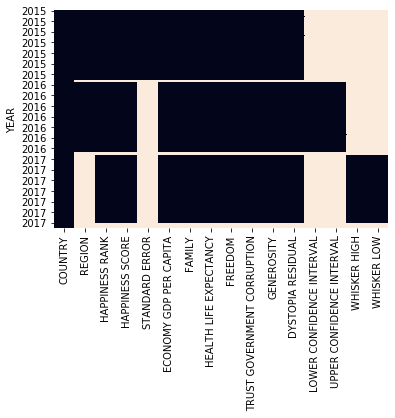

In [39]:
import seaborn as sns
combined_updated = combined.set_index('YEAR')
sns.heatmap(combined_updated.isnull(), cbar = False)

* No values are missing in the COUNTRY column
* REGION misses from 2017
* Some columns only have data populated for one year

In [40]:
regions_2017 = combined.loc[combined.YEAR == 2017, 'REGION']
regions_2017

328    NaN
329    NaN
330    NaN
331    NaN
332    NaN
      ... 
487    NaN
488    NaN
489    NaN
490    NaN
491    NaN
Name: REGION, Length: 164, dtype: object

In [41]:
missing = regions_2017.isnull().sum()
missing

164

In [42]:
regions_2017.value_counts(dropna = False)

NaN    164
Name: REGION, dtype: int64

In [43]:
regions_2015 = happiness2015[['COUNTRY', 'REGION']]
regions_2016 = happiness2016[['COUNTRY', 'REGION']]

In [44]:
regions_2015

,COUNTRY,REGION
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America
...,...,...
159,Namibia,NaN
160,Puerto Rico,NaN
161,Somalia,NaN
162,Somaliland Region,NaN


In [45]:
regions_2016

,COUNTRY,REGION
0,Denmark,Western Europe
1,Switzerland,Western Europe
2,Iceland,Western Europe
3,Norway,Western Europe
4,Finland,Western Europe
...,...,...
159,Lesotho,NaN
160,Mozambique,NaN
161,Oman,NaN
162,Somaliland region,NaN


In [46]:
regions_2015[regions_2015.COUNTRY == 'Swaziland']

,COUNTRY,REGION
100,Swaziland,Sub-Saharan Africa


In [47]:
merged_regions = regions_2015.merge(regions_2016, on = 'COUNTRY', suffixes=('_2015', '_2016'))

In [48]:
merged_regions

,COUNTRY,REGION_2015,REGION_2016
0,Switzerland,Western Europe,Western Europe
1,Iceland,Western Europe,Western Europe
2,Denmark,Western Europe,Western Europe
3,Norway,Western Europe,Western Europe
4,Canada,North America,North America
...,...,...,...
159,Namibia,NaN,Sub-Saharan Africa
160,Puerto Rico,NaN,Latin America and Caribbean
161,Somalia,NaN,Sub-Saharan Africa
162,Somaliland Region,NaN,Sub-Saharan Africa


In [49]:
merged_regions['REGION_2015'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia', nan], dtype=object)

In [50]:
region_list = [merged_regions.REGION_2015[i] if pd.notnull(merged_regions.REGION_2015[i])
               else merged_regions.REGION_2016[i] for i in range(len(merged_regions))]
region_list

['Western Europe',
 'Western Europe',
 'Western Europe',
 'Western Europe',
 'North America',
 'Western Europe',
 'Western Europe',
 'Western Europe',
 'Australia and New Zealand',
 'Australia and New Zealand',
 'Middle East and Northern Africa',
 'Latin America and Caribbean',
 'Western Europe',
 'Latin America and Caribbean',
 'North America',
 'Latin America and Caribbean',
 'Western Europe',
 'Western Europe',
 'Western Europe',
 'Middle East and Northern Africa',
 'Western Europe',
 'Middle East and Northern Africa',
 'Latin America and Caribbean',
 'Southeastern Asia',
 'Latin America and Caribbean',
 'Western Europe',
 'Latin America and Caribbean',
 'Middle East and Northern Africa',
 'Western Europe',
 'Latin America and Caribbean',
 'Central and Eastern Europe',
 'Latin America and Caribbean',
 'Latin America and Caribbean',
 'Southeastern Asia',
 'Middle East and Northern Africa',
 'Western Europe',
 'Western Europe',
 'Eastern Asia',
 'Middle East and Northern Africa',
 'La

In [51]:
merged_regions['REGION'] = region_list
merged_regions

,COUNTRY,REGION_2015,REGION_2016,REGION
0,Switzerland,Western Europe,Western Europe,Western Europe
1,Iceland,Western Europe,Western Europe,Western Europe
2,Denmark,Western Europe,Western Europe,Western Europe
3,Norway,Western Europe,Western Europe,Western Europe
4,Canada,North America,North America,North America
...,...,...,...,...
159,Namibia,NaN,Sub-Saharan Africa,Sub-Saharan Africa
160,Puerto Rico,NaN,Latin America and Caribbean,Latin America and Caribbean
161,Somalia,NaN,Sub-Saharan Africa,Sub-Saharan Africa
162,Somaliland Region,NaN,Sub-Saharan Africa,Sub-Saharan Africa


In [52]:
regions = merged_regions[['COUNTRY', 'REGION']]
regions

,COUNTRY,REGION
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America
...,...,...
159,Namibia,Sub-Saharan Africa
160,Puerto Rico,Latin America and Caribbean
161,Somalia,Sub-Saharan Africa
162,Somaliland Region,Sub-Saharan Africa


* How to bombine two columns with duplicate and complementary information??
* Use Series.combine_first() or Series.fillna()

In [53]:
regions.isnull().sum()

COUNTRY    0
REGION     0
dtype: int64

In [54]:
pd.isnull(np.nan)

True

In [55]:
regions.sort_values('COUNTRY')

,COUNTRY,REGION
152,Afghanistan,Southern Asia
94,Albania,Central and Eastern Europe
67,Algeria,Middle East and Northern Africa
136,Angola,Sub-Saharan Africa
29,Argentina,Latin America and Caribbean
...,...,...
22,Venezuela,Latin America and Caribbean
74,Vietnam,Southeastern Asia
135,Yemen,Middle East and Northern Africa
84,Zambia,Sub-Saharan Africa


In [56]:
combined = pd.merge(left = combined, right = regions, on = 'COUNTRY', how = 'left')

In [57]:
combined

,COUNTRY,REGION_x,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,REGION_y
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN,Western Europe
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN,Western Europe
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN,Western Europe
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN,Western Europe
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Latin America and Caribbean
488,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Sub-Saharan Africa
489,Somaliland region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Sub-Saharan Africa
490,Suriname,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Latin America and Caribbean


In [58]:
combined = combined.drop('REGION_x', axis = 1)

In [59]:
missing = combined.isnull().sum()

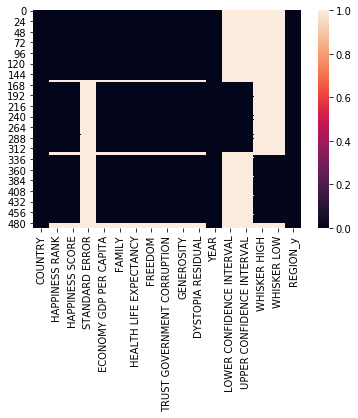

In [60]:
sns.heatmap(combined.isnull())

In [61]:
combined

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,REGION_y
0,Switzerland,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN,Western Europe
1,Iceland,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN,Western Europe
2,Denmark,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN,Western Europe
3,Norway,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN,Western Europe
4,Canada,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Latin America and Caribbean
488,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Sub-Saharan Africa
489,Somaliland region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Sub-Saharan Africa
490,Suriname,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Latin America and Caribbean


In [62]:
merged_regions

,COUNTRY,REGION_2015,REGION_2016,REGION
0,Switzerland,Western Europe,Western Europe,Western Europe
1,Iceland,Western Europe,Western Europe,Western Europe
2,Denmark,Western Europe,Western Europe,Western Europe
3,Norway,Western Europe,Western Europe,Western Europe
4,Canada,North America,North America,North America
...,...,...,...,...
159,Namibia,NaN,Sub-Saharan Africa,Sub-Saharan Africa
160,Puerto Rico,NaN,Latin America and Caribbean,Latin America and Caribbean
161,Somalia,NaN,Sub-Saharan Africa,Sub-Saharan Africa
162,Somaliland Region,NaN,Sub-Saharan Africa,Sub-Saharan Africa


In [63]:
merged_regions.REGION_2015.combine_first(merged_regions.REGION_2016)

0                   Western Europe
1                   Western Europe
2                   Western Europe
3                   Western Europe
4                    North America
                  ...             
159             Sub-Saharan Africa
160    Latin America and Caribbean
161             Sub-Saharan Africa
162             Sub-Saharan Africa
163             Sub-Saharan Africa
Name: REGION_2015, Length: 164, dtype: object

In [64]:
# good!!!!!!!!!!!!!!!!!!!!!!
merged_regions.REGION_2015.fillna(merged_regions.REGION_2016)

0                   Western Europe
1                   Western Europe
2                   Western Europe
3                   Western Europe
4                    North America
                  ...             
159             Sub-Saharan Africa
160    Latin America and Caribbean
161             Sub-Saharan Africa
162             Sub-Saharan Africa
163             Sub-Saharan Africa
Name: REGION_2015, Length: 164, dtype: object

In [65]:
combined.columns

Index(['COUNTRY', 'HAPPINESS RANK', 'HAPPINESS SCORE', 'STANDARD ERROR',
       'ECONOMY GDP PER CAPITA', 'FAMILY', 'HEALTH LIFE EXPECTANCY', 'FREEDOM',
       'TRUST GOVERNMENT CORRUPTION', 'GENEROSITY', 'DYSTOPIA RESIDUAL',
       'YEAR', 'LOWER CONFIDENCE INTERVAL', 'UPPER CONFIDENCE INTERVAL',
       'WHISKER HIGH', 'WHISKER LOW', 'REGION_y'],
      dtype='object')

* Check for duplicate data
* there are no rows with exactly the same country AND year. 

In [66]:
dups = combined.duplicated(['COUNTRY', 'YEAR'])
combined[dups]

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,REGION_y


In [67]:
combined.COUNTRY = combined.COUNTRY.str.upper()
combined

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,REGION_y
0,SWITZERLAND,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN,Western Europe
1,ICELAND,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN,Western Europe
2,DENMARK,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN,Western Europe
3,NORWAY,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN,Western Europe
4,CANADA,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,PUERTO RICO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Latin America and Caribbean
488,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Sub-Saharan Africa
489,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Sub-Saharan Africa
490,SURINAME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Latin America and Caribbean


In [68]:
dups = combined.duplicated(['COUNTRY', 'YEAR'])
combined[dups]

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,REGION_y
162,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,NaN,Sub-Saharan Africa
326,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,NaN,NaN,NaN,NaN,Sub-Saharan Africa
489,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Sub-Saharan Africa


In [69]:
combined[combined.COUNTRY == 'SOMALILAND REGION']

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,REGION_y
90,SOMALILAND REGION,91.0,5.057,0.06161,0.18847,0.95152,0.43873,0.46582,0.39928,0.50318,2.11032,2015,NaN,NaN,NaN,NaN,Sub-Saharan Africa
162,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,NaN,Sub-Saharan Africa
260,SOMALILAND REGION,97.0,5.057,NaN,0.25558,0.75862,0.33108,0.39130,0.36794,0.51479,2.43801,2016,4.934,5.18,NaN,NaN,Sub-Saharan Africa
326,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,NaN,NaN,NaN,NaN,Sub-Saharan Africa
488,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Sub-Saharan Africa
489,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Sub-Saharan Africa


In [70]:
combined = combined.drop_duplicates(['COUNTRY', 'YEAR'])

In [71]:
combined[combined.duplicated(['COUNTRY', 'YEAR'])]

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,REGION_y


* 1.Corrected the errors we made when combining our dataframes.
* 2.Used the 2015 and 2016 region values to fill in the missing regions for 2017.
However, leaving missing values in the dataframe could cause issues with other transformation tasks and change the distribution of our data set. Also note that missing data has to be dropped or replaced to work with machine learning algorithms, so if you're interested in continuing in the data science path, it's important to know how to handle them. 
* Dropping columns with missing data

In [72]:
combined.isnull().sum()

COUNTRY                          0
HAPPINESS RANK                  19
HAPPINESS SCORE                 19
STANDARD ERROR                 331
ECONOMY GDP PER CAPITA          19
FAMILY                          19
HEALTH LIFE EXPECTANCY          19
FREEDOM                         19
TRUST GOVERNMENT CORRUPTION     19
GENEROSITY                      19
DYSTOPIA RESIDUAL               19
YEAR                             0
LOWER CONFIDENCE INTERVAL      332
UPPER CONFIDENCE INTERVAL      332
WHISKER HIGH                   334
WHISKER LOW                    334
REGION_y                         0
dtype: int64

In [73]:
columns_to_drop = ['STANDARD ERROR', 'LOWER CONFIDENCE INTERVAL','UPPER CONFIDENCE INTERVAL',
                  'WHISKER HIGH', 'WHISKER LOW']
combined = combined.drop(columns_to_drop, axis = 1)
combined.isnull().sum()

COUNTRY                         0
HAPPINESS RANK                 19
HAPPINESS SCORE                19
ECONOMY GDP PER CAPITA         19
FAMILY                         19
HEALTH LIFE EXPECTANCY         19
FREEDOM                        19
TRUST GOVERNMENT CORRUPTION    19
GENEROSITY                     19
DYSTOPIA RESIDUAL              19
YEAR                            0
REGION_y                        0
dtype: int64

In [74]:
combined.notnull().sum().sort_values()

HAPPINESS RANK                 470
HAPPINESS SCORE                470
ECONOMY GDP PER CAPITA         470
FAMILY                         470
HEALTH LIFE EXPECTANCY         470
FREEDOM                        470
TRUST GOVERNMENT CORRUPTION    470
GENEROSITY                     470
DYSTOPIA RESIDUAL              470
COUNTRY                        489
YEAR                           489
REGION_y                       489
dtype: int64

In [76]:
combined.dropna(thresh=159, axis=1)
# Drop all columns in combined with 159 or less non null values

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,REGION_y
0,SWITZERLAND,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,Western Europe
1,ICELAND,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,Western Europe
2,DENMARK,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,Western Europe
3,NORWAY,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,Western Europe
4,CANADA,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,North America
...,...,...,...,...,...,...,...,...,...,...,...,...
486,OMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Middle East and Northern Africa
487,PUERTO RICO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Latin America and Caribbean
488,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa
490,SURINAME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Latin America and Caribbean


In [77]:
combined.isnull().sum()

COUNTRY                         0
HAPPINESS RANK                 19
HAPPINESS SCORE                19
ECONOMY GDP PER CAPITA         19
FAMILY                         19
HEALTH LIFE EXPECTANCY         19
FREEDOM                        19
TRUST GOVERNMENT CORRUPTION    19
GENEROSITY                     19
DYSTOPIA RESIDUAL              19
YEAR                            0
REGION_y                        0
dtype: int64

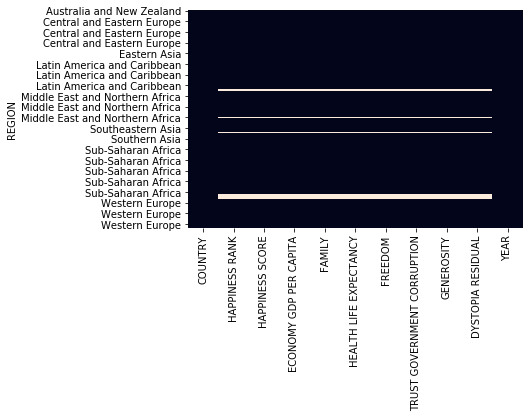

In [80]:
combined.rename(columns = {'REGION_y' : 'REGION'}, inplace = True)
sorted_index = combined.set_index('REGION').sort_values(['REGION', 'HAPPINESS SCORE'])
sns.heatmap(sorted_index.isnull(), cbar = False)

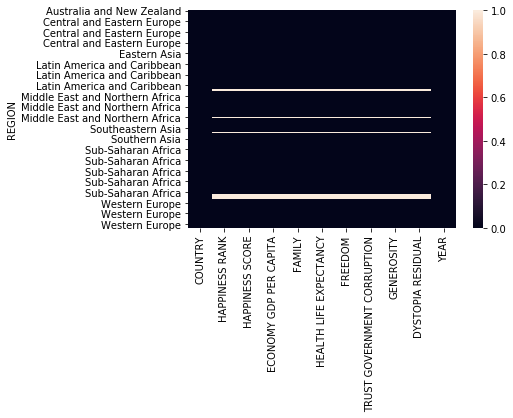

In [85]:
sns.heatmap(combined.set_index('REGION').isnull().sort_values(['REGION', 'HAPPINESS SCORE']))

* The missing values are missing in almost every column. So dropping the missing values won't cause us to lose valuable information in other columns.

In [93]:
happiness_mean = combined['HAPPINESS SCORE'].mean()
happiness_mean

5.370727659882893

In [94]:
combined['HAPPINESS SCORE UPDATED'] = combined['HAPPINESS SCORE'].fillna(happiness_mean)
combined['HAPPINESS SCORE UPDATED'].mean()

5.370727659882894

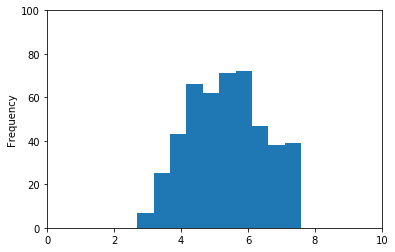

In [99]:
combined['HAPPINESS SCORE'].plot(kind = 'hist', xlim = (0,10), ylim = (0, 100))

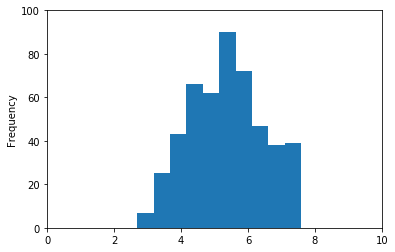

In [100]:
combined['HAPPINESS SCORE UPDATED'].plot(kind = 'hist', xlim = (0,10), ylim = (0,100))

In [101]:
combined.pivot_table(index = 'REGION', values = 'HAPPINESS SCORE', margins = True)

,HAPPINESS SCORE
REGION,
Australia and New Zealand,7.302500
Central and Eastern Europe,5.371184
Eastern Asia,5.632333
Latin America and Caribbean,6.069074
Middle East and Northern Africa,5.387879
North America,7.227167
Southeastern Asia,5.364077
Southern Asia,4.590857
Sub-Saharan Africa,4.150957


In [102]:
combined = combined.dropna()
missing = combined.isnull().sum()

In [103]:
missing

COUNTRY                        0
HAPPINESS RANK                 0
HAPPINESS SCORE                0
ECONOMY GDP PER CAPITA         0
FAMILY                         0
HEALTH LIFE EXPECTANCY         0
FREEDOM                        0
TRUST GOVERNMENT CORRUPTION    0
GENEROSITY                     0
DYSTOPIA RESIDUAL              0
YEAR                           0
REGION                         0
HAPPINESS SCORE UPDATED        0
dtype: int64

#### Workflow to clean missing values:
* --> Check for errors in data cleaning/transformaton
* --> Use data from additional sources to fill missing values
* --> Drop row/column
* --> Fill missing values with reasonable estimates computed from the available data

#### Data Cleaning workflow
* 1. Set a goal for the project
* 2. Researched and tried to understand the data
* 3. Determined what data was needed to complete the analysis
* 4. Added columns
* 5. Cleaned specific data types
* 6. Combined data sets
* 7. Removed duplicte values
* 8. Handled the missing values